In [8]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [10]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [11]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "potato-diseases/",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE 
    


)

Found 2148 files belonging to 3 classes.


In [12]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [13]:
len(dataset)

68

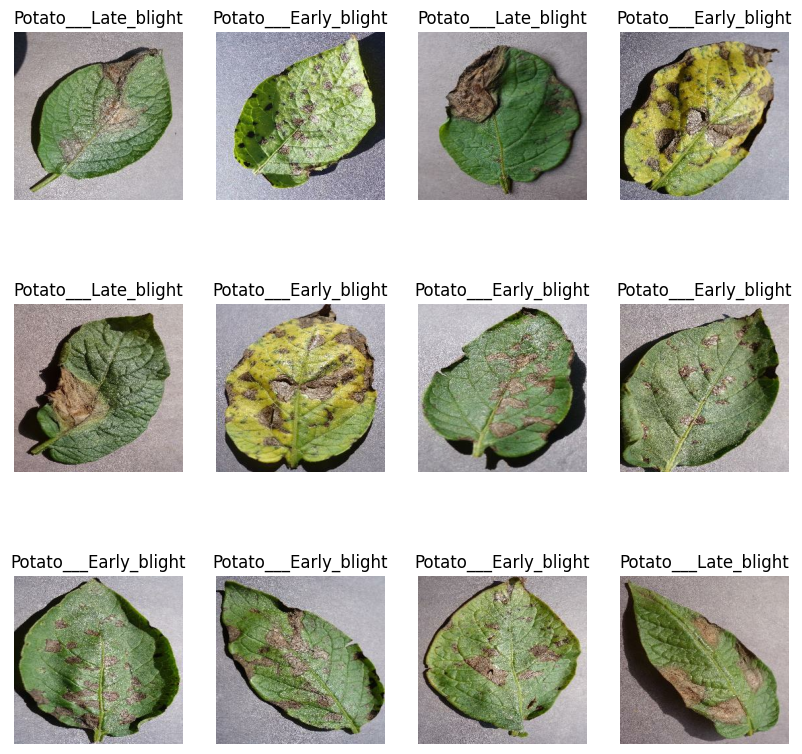

In [14]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

## 80% ==> training
## 20% ==> 10% validation, 10% test

In [15]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [16]:
train_ds = dataset.take(54)
len(train_ds)

54

In [17]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [18]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [19]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [20]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [21]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split = 0.1, test_split = 0.1, shuffle = True,shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    
    return train_ds, val_ds, test_ds

In [22]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [23]:
len(train_ds)

54

In [24]:
len(val_ds)

6

In [25]:
len(test_ds)

8

In [27]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
resize_and_rescaling = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [29]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [30]:
input_shape = (BATCH_SIZE , IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescaling,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape = input_shape)

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     multiple                  0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_9 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [31]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [33]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data = val_ds
)

Epoch 1/50
54/54 [==============================] - 107s 2s/step - loss: 0.9068 - accuracy: 0.4884 - val_loss: 0.8582 - val_accuracy: 0.6198
Epoch 2/50
54/54 [==============================] - 94s 2s/step - loss: 0.7100 - accuracy: 0.6863 - val_loss: 0.6125 - val_accuracy: 0.6823
Epoch 3/50
54/54 [==============================] - 89s 2s/step - loss: 0.4181 - accuracy: 0.8206 - val_loss: 0.4294 - val_accuracy: 0.8385
Epoch 4/50
54/54 [==============================] - 89s 2s/step - loss: 0.3769 - accuracy: 0.8356 - val_loss: 0.4317 - val_accuracy: 0.8281
Epoch 5/50
54/54 [==============================] - 88s 2s/step - loss: 0.2910 - accuracy: 0.8819 - val_loss: 0.3524 - val_accuracy: 0.8490
Epoch 6/50
54/54 [==============================] - 89s 2s/step - loss: 0.2522 - accuracy: 0.9022 - val_loss: 0.2529 - val_accuracy: 0.9010
Epoch 7/50
54/54 [==============================] - 88s 2s/step - loss: 0.2311 - accuracy: 0.9103 - val_loss: 0.2872 - val_accuracy: 0.8802
Epoch 8/50
54/54 [=

In [37]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 5s 410ms/step - loss: 0.1593 - accuracy: 0.9453


In [38]:
scores

[0.15925300121307373, 0.9453125]

In [39]:
history

In [40]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [42]:
history.history['accuracy']

[0.48842594027519226,
 0.6863425970077515,
 0.8206018805503845,
 0.8356481194496155,
 0.8819444179534912,
 0.9021990895271301,
 0.9103009104728699,
 0.9259259104728699,
 0.9346064925193787,
 0.9276620149612427,
 0.9502314925193787,
 0.9467592835426331,
 0.9589120149612427,
 0.9571759104728699,
 0.9681712985038757,
 0.9629629850387573,
 0.9699074029922485,
 0.9658564925193787,
 0.9861111044883728,
 0.9664351940155029,
 0.9861111044883728,
 0.9565972089767456,
 0.9716435074806213,
 0.9791666865348816,
 0.9728009104728699,
 0.9803240895271301,
 0.9820601940155029,
 0.9745370149612427,
 0.9820601940155029,
 0.9751157164573669,
 0.9803240895271301,
 0.9907407164573669,
 0.9826388955116272,
 0.9878472089767456,
 0.9866898059844971,
 0.9918981194496155,
 0.9866898059844971,
 0.9861111044883728,
 0.9901620149612427,
 0.9890046119689941,
 0.9820601940155029,
 0.9664351940155029,
 0.9878472089767456,
 0.9693287014961243,
 0.9895833134651184,
 0.9930555820465088,
 0.9936342835426331,
 0.994791686

In [43]:
type(history.history['loss'])

list

In [44]:
len(history.history['loss'])

50

In [45]:
history.history['loss'][:5]

[0.9067631363868713,
 0.7100067734718323,
 0.4180627465248108,
 0.3768882155418396,
 0.2910059690475464]

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

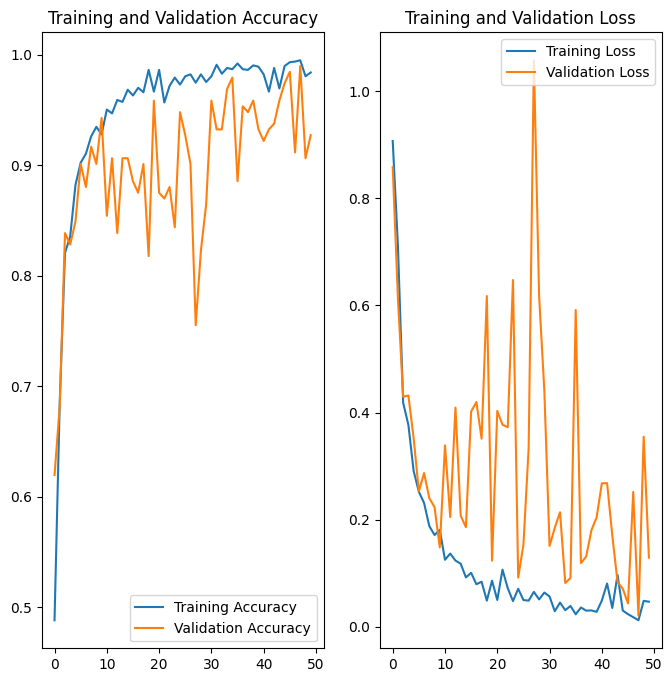

In [47]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 802ms/step
predicted label: Potato___Late_blight


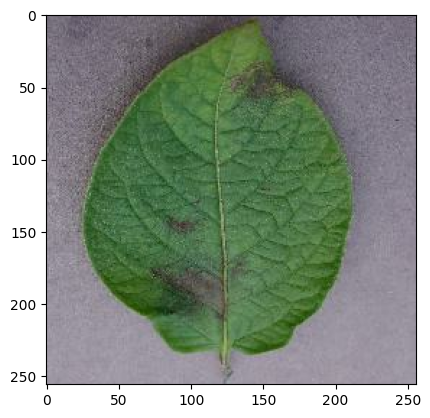

In [48]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [49]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 82ms/step


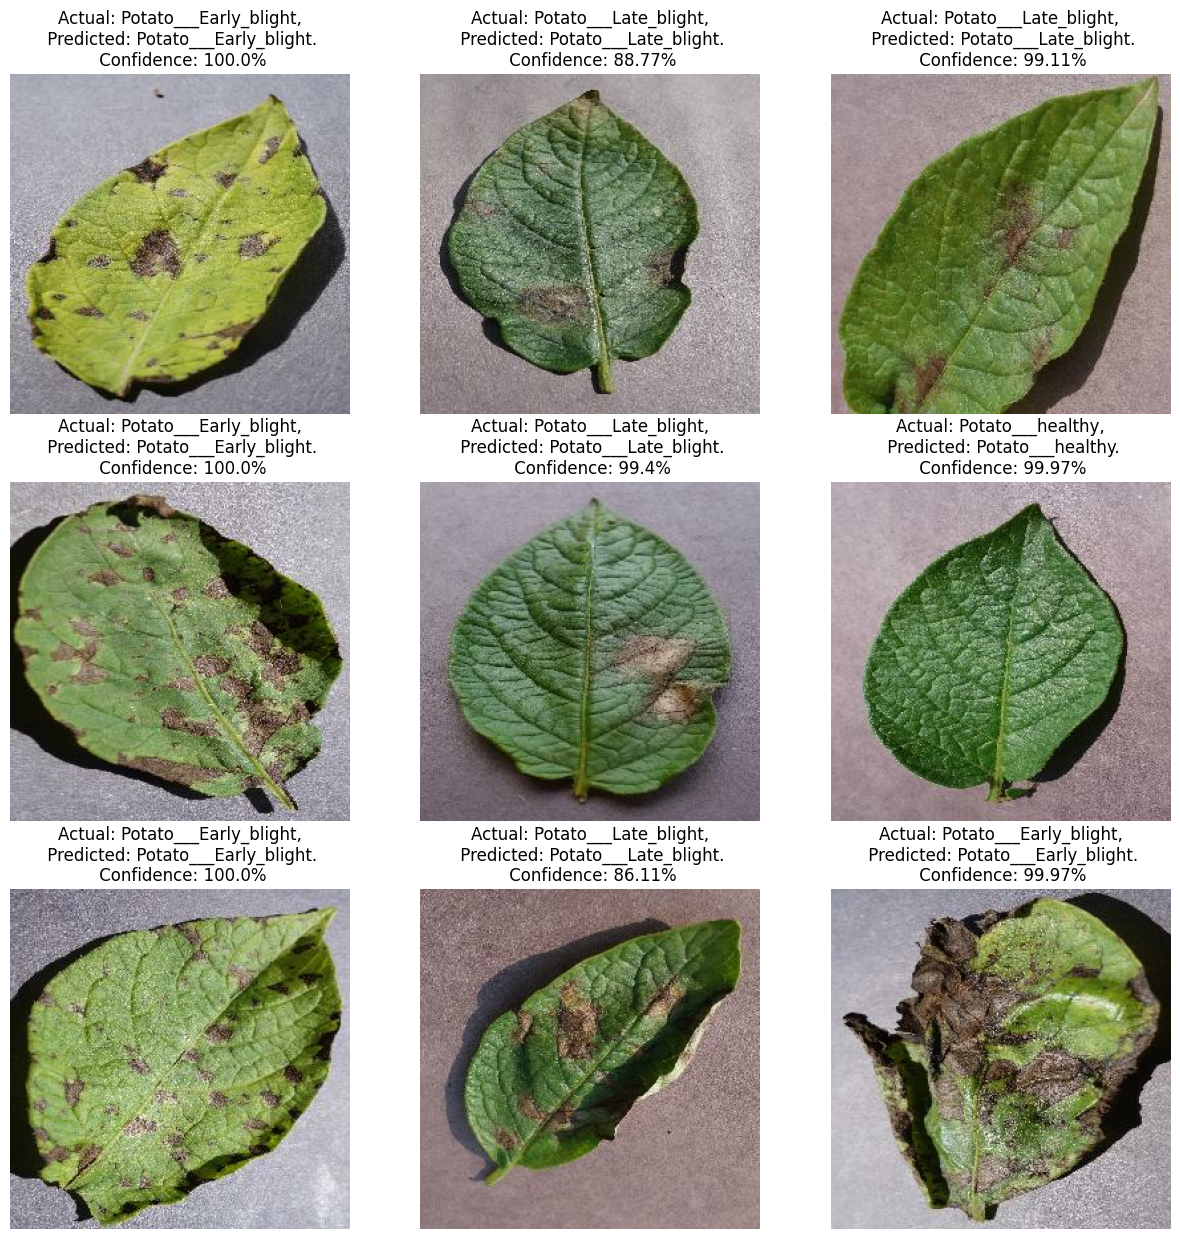

In [50]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [56]:
import os
model_version = max([int (i) for i in os.listdir("./model/") + [0]])+1
model.save(f"./model/{model_version}")

INFO:tensorflow:Assets written to: ./model/3\assets


INFO:tensorflow:Assets written to: ./model/3\assets
